- Setup and Import

- Load Data

- Selecting relevant features

- Dealing outliers
    - Detecting outliers 
    - Handlinga outliers 

- Dealing missing values
    - Removing missing values
    - Filling missing values

- Normalization

- Descriptive Statistics



## Environment Setup

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd 
import os

import helpers.data_mining_helpers as dmh
import helpers.draw_statistic_graph as dsg
import _const as const
import _preprocessing

In [ ]:
for path in const.dir_path.values():
    os.makedirs(path, exist_ok=True)    


## Load Data

In [ ]:
train_data = pd.read_csv(os.path.join(const.dir_path["raw_data_dir"], 'train.csv'))

In [ ]:
print("train_data length:", len(train_data))

## Selecting relevant features

In [ ]:

# training data (input)
train_data = train_data[const.train_features]
train_data.to_csv(os.path.join(const.dir_path["select_relevant_features_dir"], "train_data.csv"), index=False)
# training data (output)
# y_train_data= train_data['PCIAT-PCIAT_Total']
# y_train_data = train_data['sii']
# y_train_data.to_csv(os.path.join(dir_path["select_relevant_features_dir"], "y_train_data.csv"), index=False)

print(len(train_data))

In [ ]:
dsg.Compare_Features_Occurrences(train_data)

## Dealing Outliers

### Detecting Outliers

In [ ]:
train_data = pd.read_csv(os.path.join(const.dir_path["select_relevant_features_dir"], 'train_data.csv'))
before_removing_outliers_value_train_data = train_data

In [ ]:
Outlier_detector = _preprocessing.Outlier.Detect()

#### (Option 1) IQR Method

In [ ]:
Outlier_detector.IQR(train_data)

#### (Option 2) Z-Scores Method

In [ ]:
Outlier_detector.Z_Scores(train_data)

### Removing Outliers

In [ ]:
Outlier_remover = _preprocessing.Outlier.Remove()

#### (Option 1) IQR Method

In [ ]:
train_data = Outlier_remover.IQR(before_removing_outliers_value_train_data)

#### (Option 2) Z-scores Method

In [ ]:
train_data = Outlier_remover.Z_Scores(before_removing_outliers_value_train_data)

#### (Option 3) Keep the outliers

In [ ]:
train_data = Outlier_remover.Unchange(before_removing_outliers_value_train_data)

#### Compare Occurrences of Features

In [ ]:
dsg.Compare_Features_Occurrences(before_removing_outliers_value_train_data, train_data)

## Dealing missing value

In [ ]:
# Choose one of them to read data from previous stage
# train_data = pd.read_csv(os.path.join(dir_path["remove_outliers_dir"], 'remove_IQR_Method.csv'))
# train_data = pd.read_csv(os.path.join(dir_path["remove_outliers_dir"], 'remove_Z-Scores_Method.csv'))
# train_data = pd.read_csv(os.path.join(dir_path["remove_outliers_dir"], 'not_change.csv'))
before_remove_missing_value_train_data = train_data

### Remove

In [ ]:
MissingValues_Remover = _preprocessing.MissingValues.Remove()

#### (Option 1) Remove all of paritcipant who has missing value 

In [ ]:
train_data = MissingValues_Remover.Remove_all(before_remove_missing_value_train_data)

#### (Option 2) Remove some paritcipant whose missing_values_count is greater than N

In [ ]:
train_data = MissingValues_Remover.Remove_n(before_remove_missing_value_train_data)

#### (Option 3) Remove some features whose missing_values_count is greater than N

In [ ]:
#train_data = before_remove_missing_value_train_data

## Count by columns
#missing_count = X_train_data.isnull().sum()

##n = 1400
# Reserve iff missing_count is less n
#X_train_data = X_train_data.loc[:, missing_count < n]


#X_train_data.to_csv(os.path.join(dir_path["remove_missing_value_dir"], 'by_missing_count_n_features.csv'), index=False)

#print(len(X_train_data.columns))

#### (Option 4) Keep the missing_values

In [ ]:
train_data = MissingValues_Remover.Unchange(before_remove_missing_value_train_data)

### Filling

In [ ]:
# Choose one of them to read data from previous stage 
# train_data = pd.read_csv(os.path.join(dir_path["remove_missing_value_dir"], 'by_missing_count_0.csv'))
# train_data = pd.read_csv(os.path.join(dir_path["remove_missing_value_dir"], 'by_missing_count_n.csv'))
# train_data = pd.read_csv(os.path.join(dir_path["remove_missing_value_dir"], 'not_change.csv'))
train_data

In [ ]:
before_fill_missing_value_train_data = train_data

In [ ]:
MissingValues_Filler = _preprocessing.MissingValues.Fill()

#### (Option 1) Filling missing values with Mean

In [ ]:
train_data = MissingValues_Filler.Fill_Mean(before_fill_missing_value_train_data)

#### (Option 2) Filling missing values with Median

In [ ]:
train_data = MissingValues_Filler.Fill_Median(before_fill_missing_value_train_data)

#### (Option 3) Filling missing values with Forward Fill (mostly used for series data)

In [ ]:
train_data = MissingValues_Filler.Fill_Forward(before_fill_missing_value_train_data)

#### (Option 4) Filling missing values with Backward Fill (mostly used for series data)

In [ ]:
train_data = MissingValues_Filler.Fill_Backward(before_fill_missing_value_train_data)

#### (Option 5) Filling missing values with Interpolation

In [ ]:
train_data = MissingValues_Filler.Fill_Interpolation(before_fill_missing_value_train_data)

## Descriptive Statistics

In [ ]:
dsg.Descriptive_Statistics(train_data)

## Normalization 
From now on, we split train_data to X, y data, and do the normalization separately.

In [ ]:
# Choose one of them to read data from previous stage
# train_data = pd.read_csv(os.path.join(const.dir_path["fill_missing_value_dir"], 'Mean_Method.csv'))
train_data = pd.read_csv(os.path.join(const.dir_path["fill_missing_value_dir"], 'Median_Method.csv'))
# train_data = pd.read_csv(os.path.join(const.dir_path["fill_missing_value_dir"], 'Interpolation_Method.csv'))
# train_data = pd.read_csv(os.path.join(const.dir_path["fill_missing_value_dir"], 'Forward_Fill_Method.csv'))
# train_data = pd.read_csv(os.path.join(const.dir_path["fill_missing_value_dir"], 'Backward_Fill_Method.csv'))
before_normalize_data = train_data
train_data

In [ ]:
X_train_data = train_data.drop(columns=['sii'])
y_train_data = train_data['sii']

In [ ]:
X_train_data.shape, y_train_data.shape

### Dealing Continuous data

In [ ]:
before_dealing_continuous_X_train_data = X_train_data

In [ ]:
X_train_categorical_data = X_train_data[const.categorical_features]
X_train_continuous_data = X_train_data[const.continuous_features]

In [ ]:
Normalizer = _preprocessing.Normalization()

#### StandardScaler Method

In [ ]:
X_train_normalized, scaler = Normalizer.StandardScaler(X_train_continuous_data)

#### MinMaxScaler

In [ ]:
X_train_normalized, scaler = Normalizer.MinMaxScaler(X_train_continuous_data)

#### MaxAbsScaler

In [ ]:
X_train_normalized  = Normalizer.MaxAbsScaler(X_train_continuous_data)

#### RobustScaler

In [ ]:
X_train_normalized = Normalizer.RobustScaler(X_train_continuous_data)

### Dealing Categorical data

In [ ]:
X_train_categorized, encoder = Normalizer.OneHotEncoder(X_train_categorical_data)

### Combine data

In [ ]:
X_train_data = pd.DataFrame(
    X_train_normalized, columns=X_train_continuous_data.columns
).join(pd.DataFrame(X_train_categorized, columns=encoder.get_feature_names_out()))


In [ ]:
X_train_data.shape

In [ ]:
y_train_data.shape

In [ ]:
X_train_data.to_csv(os.path.join(const.dir_path['final_training_data_dir'], 'X_train_data.csv'), index=False)
y_train_data.to_csv(os.path.join(const.dir_path['final_training_data_dir'], 'y_train_data.csv'), index=False)

## Model Training

In [ ]:
X_train_data = pd.read_csv(os.path.join(const.dir_path['final_training_data_dir'], 'X_train_data.csv'))
y_train_data = pd.read_csv(os.path.join(const.dir_path['final_training_data_dir'], 'y_train_data.csv'))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=42)
y_train = y_train.squeeze()
y_test = y_test.squeeze()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Unsupervised Learning

In [ ]:
from _models import UnsupervisedLearning

#### Dimensionality Reduction 

In [ ]:
Reducer = UnsupervisedLearning.Dimensionality_Reduction()

##### PCA

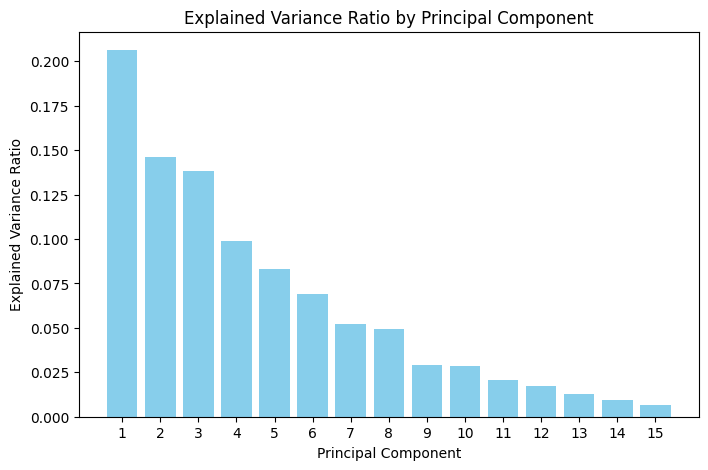

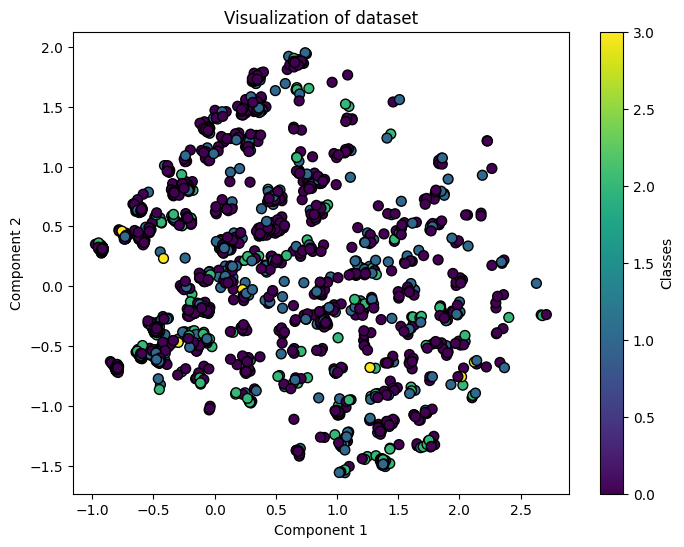

array([[-0.62583503,  0.62974427,  0.46148606, ..., -0.03289218,
         0.00900914,  0.17515672],
       [ 0.45457039,  0.4649242 , -1.15172019, ..., -0.13426473,
        -0.03578422,  0.08510876],
       [-0.48084395, -0.54992593, -0.301596  , ..., -0.26667359,
        -0.0052331 ,  0.08215413],
       ...,
       [-0.45312171, -0.6298064 , -0.21952828, ...,  0.05691635,
         0.11835148,  0.3129209 ],
       [-0.47544813, -0.61331003, -0.2003711 , ...,  0.313336  ,
         0.02928998,  0.38101946],
       [ 2.26529679,  0.98395645,  0.62190505, ...,  0.28656458,
        -0.03701201, -0.08124118]])

In [21]:
Reducer.PCA(X_train, y_train, 15)

##### t-SNE

In [ ]:
Reducer.TSNE(X_train, y_train)

#### Clustering

In [ ]:
UL_Clustering = UnsupervisedLearning.Clustering()

##### K-Means Clustering

In [ ]:
model = UL_Clustering.KMeans(X_train)

In [14]:
prediction = model.predict(X_train)

In [15]:
from sklearn.metrics import adjusted_mutual_info_score
ami_score = adjusted_mutual_info_score(y_train, prediction)
print("Adjusted Mutual Information:", ami_score)

Adjusted Mutual Information: 0.0180555791760132


##### Hierarchical Clustering

In [16]:
UL_Clustering.Hierarchy_Cluster(X_train)

Clusters: [0 1 2 3] Labels: [3 3 3 ... 3 3 1] 
Silhouette Score: 0.22930252397046924


##### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [17]:
UL_Clustering.DBSCAN(X_train)

Clusters: [-1  0  1] 
Labels: [0 0 0 ... 0 0 0] 
Silhouette Score: 0.20401083515480933


#### Association Rule Mining

#### Others:
- Gaussian Mixture Models (GMM)

- Autoencoders

- Independent Component Analysis (ICA)

- Self-Organizing Maps (SOM)

- BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

### Supervised Learning

In [ ]:
import pickle
from _models import SupervisedLearning

In [ ]:
SL = SupervisedLearning()

#### Linear Regression (https://realpython.com/linear-regression-in-python/)

In [ ]:
Linear_Regression_model = SL.Linear_Regression(X_train, y_train)

# predict
y_pred = Linear_Regression_model.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse: .4f}')
print(f'R^2 Score: {r2: .4f}')

with open('./models/Linear_Regression_model.pkl', 'wb') as file:
    pickle.dump(Linear_Regression_model, file)

#### Logistic Regression

In [ ]:
Logistic_Regression_model = SL.Logistic_Regression(X_train, y_train)

# predict
y_pred = Logistic_Regression_model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy: .4f}")
print("Classification Report:\n", class_report)

with open('./models/Logistic_Regression_model.pkl', 'wb') as file:
    pickle.dump(Logistic_Regression_model, file)

#### Decision Trees

In [ ]:
Decision_Tree_model = SL.Decision_Tree(X_train, y_train)

# predict
y_pred = Decision_Tree_model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy: .4f}")



#### Random Forest

In [ ]:
Random_Forest_model = SL.RandomForest(X_train, y_train)

# predict
y_pred = Random_Forest_model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy:.4f}")

with open('./models/Random_Forest_model.pkl', 'wb') as file:
    pickle.dump(Logistic_Regression_model, file)

#### SVM (Support Vector Machines)

In [ ]:
SVM_model = SL.SVM(X_train, y_train)

# predict
y_pred = SVM_model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)

print(f"SVM Accuracy: {accuracy:.4f}")

with open('./models/SVM_model.pkl', 'wb') as file:
    pickle.dump(SVM_model, file)


#### KNN (K-nearest Neighbors)

In [ ]:
best_k = -1
best_accuracy = -1
for i in range(1, 50):
    KNN_model = SL.KNN(X_train, y_train, n_neighbors=i)

    y_pred = KNN_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    if best_accuracy < accuracy:
        best_accuracy = accuracy
        best_k = i
    
print(f"Best Accuracy: {best_accuracy * 100:.2f}%", "\nBest K:", best_k)
KNN_model = SL.KNN(X_train, y_train, n_neighbors=best_k)

with open('./models/KNN_model.pkl', 'wb') as file:
    pickle.dump(KNN_model, file)

#### Naive Bayes

In [ ]:
Naive_Bayes_model = SL.Naive_Bayes(X_train, y_train)

# predict
y_pred = Naive_Bayes_model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_pred, y_test)

print(f"Naive Bayes Accuracy: {accuracy:.4f}") 

with open('./models/Naive_Bayes_model.pkl', 'wb') as file:
    pickle.dump(Naive_Bayes_model, file)

#### Others: 
- Gradient Boosting Machines (GBM)

- Linear Discriminant Analysis (LDA)

## Test Model

Before starting test our models, we have to convert the form of our test data into training form

### Preprocess Test Data

In [ ]:
import pandas as pd
import os
import _const as const

In [ ]:
X_test_data = pd.read_csv(os.path.join(const.dir_path["raw_data_dir"], 'test.csv'))
IDs = X_test_data['id']
X_test_data = X_test_data[const.input_features]

In [ ]:
X_test_data = X_test_data.fillna(before_normalize_data.median(), inplace=False)

In [ ]:
X_test_continuous_data = X_test_data[const.continuous_features]
X_test_categorical_data = X_test_data[const.categorical_features]

In [ ]:
# The scaler and encoder here are using the scaler and encoder we were using at normalization(continuous and categorical)

X_test_normalized = scaler.transform(X_test_continuous_data)
X_test_categorized = encoder.transform(X_test_categorical_data)

In [ ]:
X_test_data = pd.DataFrame(
    X_test_normalized, columns=X_test_continuous_data.columns
).join(pd.DataFrame(X_test_categorized, columns=encoder.get_feature_names_out()))


In [ ]:
X_test_data.to_csv(os.path.join(const.dir_path["final_test_data_dir"], "X_test_data.csv"), index=False)

### Predict

In [ ]:
Linear_Regression_prediction = Linear_Regression_model.predict(X_test_data)
Logistic_Regression_prediction = Logistic_Regression_model.predict(X_test_data)
Decision_Tree_prediction = Decision_Tree_model.predict(X_test_data)
Random_Forest_prediction = Random_Forest_model.predict(X_test_data)
SVM_prediction = SVM_model.predict(X_test_data)
KNN_prediction = KNN_model.predict(X_test_data)
Naive_Bayes_prediction = Naive_Bayes_model.predict(X_test_data)

Linear_Regression_prediction, Logistic_Regression_prediction, Decision_Tree_prediction, Random_Forest_prediction, SVM_prediction, KNN_prediction, Naive_Bayes_prediction

### Combined ID with output for submission

In [ ]:
model_prediction_name = ['Linear_Regression_prediction', 'Logistic_Regression_prediction', 'Decision_Tree_prediction', 
                        'Random_Forest_prediction', 'SVM_prediction', 'KNN_prediction', 'Naive_Bayes_prediction']

for name in model_prediction_name:
    prediction = globals().get(name, None)
    pd.DataFrame({
        'id': IDs,
        'sii': prediction.astype(int)
    }).to_csv(os.path.join(const.dir_path['predict_result_dir'], f'{name}.csv'))